In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving crimedata_simplified.xlsx to crimedata_simplified.xlsx


In [3]:
dff1 = pd.read_excel("crimedata_simplified.xlsx", sheet_name = "IPC", usecols=lambda x: 'Unnamed' not in x)

In [4]:
df1 = dff1.copy()

In [5]:
dff2 = pd.read_excel("crimedata_simplified.xlsx", sheet_name = "women", usecols=lambda x: 'Unnamed' not in x)
df2 = dff2.copy()

In [6]:
dff3 = pd.read_excel("crimedata_simplified.xlsx", sheet_name = "ndps", usecols=lambda x: 'Unnamed' not in x)
df3 = dff3.copy()

In [7]:
dff4 = pd.read_excel("crimedata_simplified.xlsx", sheet_name = "brothels", usecols=lambda x: 'Unnamed' not in x)
df4 = dff4.copy()

In [8]:
dff5 = pd.read_excel("crimedata_simplified.xlsx", sheet_name = "ecconomic_offenses", usecols=lambda x: 'Unnamed' not in x)
df5 = dff5.copy()

In [9]:
dff6 = pd.read_excel("crimedata_simplified.xlsx", sheet_name = "cyber", usecols=lambda x: 'Unnamed' not in x)
df6 = dff6.copy()

IPC CRIMES

In [ ]:
df1.head()

,Crime Heads,sep25_R,sep25_D,aug25_R,aug_25_D,this_yr_R,this_yr_D,% of Detection_this,prev_yr_R,prev_yr_D,% of Detection_prev
0,Murder,11,11,6,6,98,95,97,78,77,99
1,Att.to.C.Murder,31,29,16,16,232,229,99,240,238,99
2,Dacoity,1,1,1,0,9,9,100,19,19,100
3,Prep.for Dacoity,0,0,0,0,2,2,100,8,8,100
4,Robbery,27,23,23,22,204,200,98,398,391,98


In [ ]:
df1["change_R"] = df1["sep25_R"] - df1["aug25_R"]

In [ ]:
cols = df1.select_dtypes(include = ['object']).columns
for col in cols:
  df1[col] = df1[col].str.strip()

In [ ]:
df1 = df1.drop(18, axis = 0)

In [ ]:
df1.sort_values(by = 'sep25_R', ascending = False, inplace = True)

In [ ]:
df1 = df1.drop(17, axis = 0)

In [ ]:
df1.reset_index(inplace = True)

In [ ]:
df1.drop(columns = 'index', inplace = True)

In [ ]:
df1.sort_values(by = 'change_R', ascending = False, inplace = True)

In [ ]:
df1['R/D'] = df1['sep25_D']/df1['sep25_R']

In [ ]:
df1.sort_values(by = 'R/D', ascending = False, inplace = True)

In [ ]:
df1['Diff_this_prev'] = df1['this_yr_R']/df1['this_yr_D'] - df1['prev_yr_R']/df1['prev_yr_D']

In [ ]:
df1.sort_values(by = 'Diff_this_prev', ascending = False, inplace = True)

In [ ]:
total_cases = df1["sep25_R"].sum()
total_detected = df1["sep25_D"].sum()
overall_rate = (total_detected / total_cases) * 100
print("Overall detection rate (Sep 2025):", round(overall_rate, 2), "%")

Overall detection rate (Sep 2025): 51.04 %


In [ ]:
total_cases_prev = df1["aug25_R"].sum()
total_detected_prev = df1["aug_25_D"].sum()
overall_rate_prev = (total_detected_prev / total_cases_prev) * 100
print("Overall detection rate (Aug 2025):", round(overall_rate_prev, 2), "%")

Overall detection rate (Aug 2025): 49.62 %


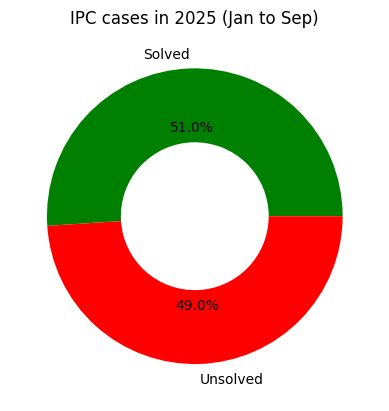

In [ ]:
plt.pie([total_detected, total_cases - total_detected], labels = ["Solved", "Unsolved"],autopct='%1.1f%%', colors = ["green", "red"], wedgeprops={'width': 0.5})
plt.title("IPC cases in 2025 (Jan to Sep)")
plt.show()

In [ ]:
top_det = df1.sort_values("% of Detection_this", ascending=False).head(5)
print(top_det[["Crime Heads", "% of Detection_this"]])

         Crime Heads  % of Detection_this
14           Dacoity                  100
16  Prep.for Dacoity                  100
7    Att.to.C.Murder                   99
1               Hurt                   98
9            Robbery                   98


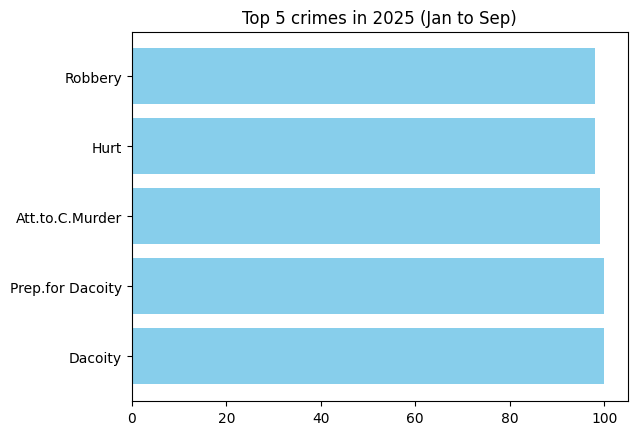

In [ ]:
plt.barh(top_det['Crime Heads'], top_det['% of Detection_this'], color = 'skyblue')
plt.title("Top 5 crimes in 2025 (Jan to Sep)")
plt.show()

In [ ]:
low_det = df1.sort_values("% of Detection_this").head(5)
print(low_det[["Crime Heads", "% of Detection_this"]])

     Crime Heads  % of Detection_this
0        Thefts.                   32
2    M.V.Thefts.                   58
5   H.B.T.Night.                   64
11     H.B.T.Day                   64
12     Snatching                   83


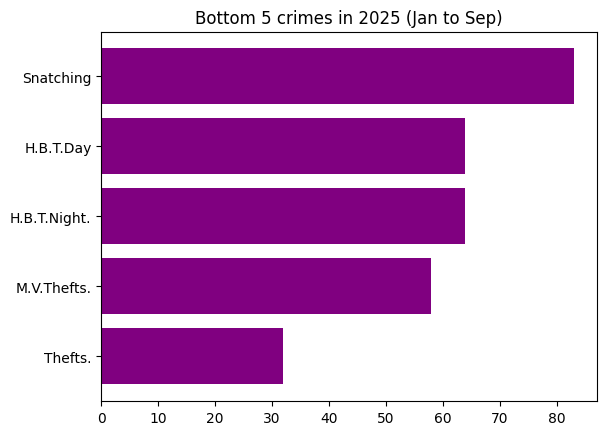

In [ ]:
plt.barh(low_det['Crime Heads'], low_det['% of Detection_this'], color = 'purple')
plt.title("Bottom 5 crimes in 2025 (Jan to Sep)")
plt.show()

In [ ]:
df1["share"] = (df1["sep25_R"] / df1["sep25_R"].sum()) * 100

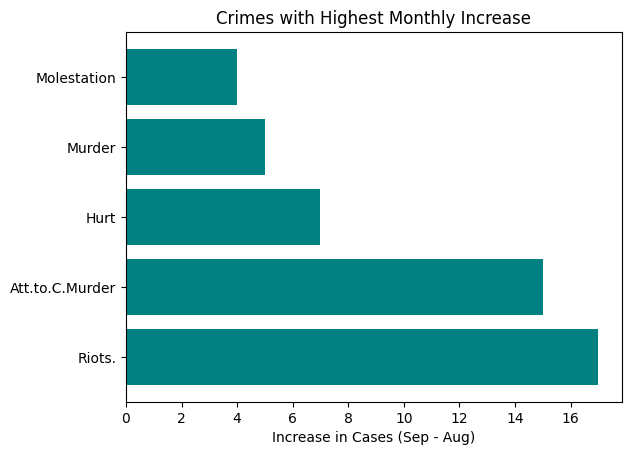

In [ ]:
top_inc = df1.sort_values("change_R", ascending=False).head(5)
plt.barh(top_inc["Crime Heads"], top_inc["change_R"], color="teal")
plt.xlabel("Increase in Cases (Sep - Aug)")
plt.title("Crimes with Highest Monthly Increase")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

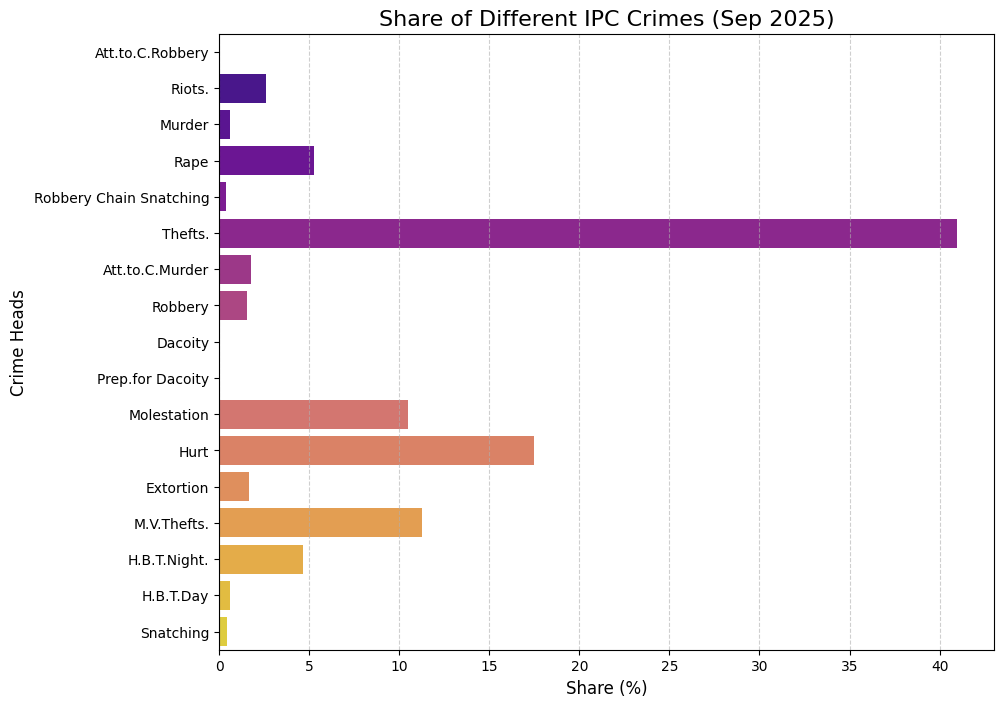

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x="share", y="Crime Heads", data=df1, palette="plasma", hue="Crime Heads", legend=False)
plt.title("Share of Different IPC Crimes (Sep 2025)", fontsize=16)
plt.xlabel("Share (%)", fontsize=12)
plt.ylabel("Crime Heads", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
from google.colab import files
ipc_crimes_img = 'ipc.png'
plt.savefig(ipc_crimes_img)
files.download(ipc_crimes_img)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

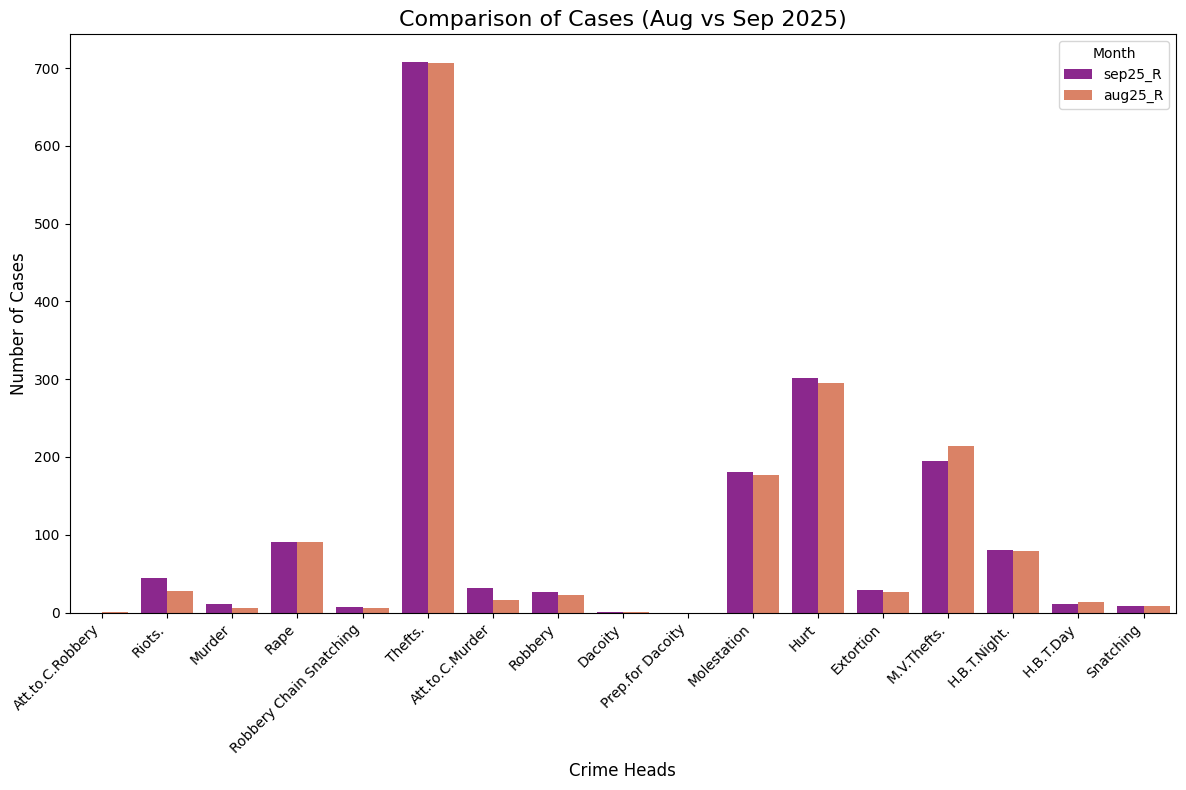

In [ ]:
df1_comparison = df1[['Crime Heads', 'sep25_R', 'aug25_R']].melt('Crime Heads', var_name='Month', value_name='Number of Cases')

plt.figure(figsize=(12, 8))
sns.barplot(x='Crime Heads', y='Number of Cases', palette = 'plasma', hue='Month', data=df1_comparison)
plt.title('Comparison of Cases (Aug vs Sep 2025)', fontsize=16)
plt.xlabel('Crime Heads', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
from google.colab import files
ipc_comp = 'ipc_comp.png'
plt.savefig(ipc_comp)
files.download(ipc_comp)
plt.show()

Crimes related to women

In [ ]:
df2 = df2.fillna(0)

In [ ]:
df2.sort_values(by = 'sep25_R', ascending = False, inplace = True)

In [ ]:
df2['Unsolved_S'] = df2['sep25_R'] - df2['sep25_D']

In [ ]:
df2['Unsolved_A'] = df2['aug25_R'] - df2['aug25_D']

In [ ]:
df2['sep_aug_unsolved_diff'] = df2['Unsolved_S'] - df2['Unsolved_A']

In [ ]:
df2.sort_values(by = 'sep_aug_unsolved_diff', ascending = False, inplace = True)

In [ ]:
total_cases_w = df2["sep25_R"].sum()
total_detected_w = df2["sep25_D"].sum()
overall_rate_w = (total_detected_w / total_cases_w) * 100
print("Overall detection rate (Sep 2025):", round(overall_rate_w, 2), "%")

Overall detection rate (Sep 2025): 77.69 %


In [ ]:
total_cases_wa = df2["aug25_R"].sum()
total_detected_wa = df2["aug25_D"].sum()
overall_rate_wa = (total_detected_wa / total_cases_wa) * 100
print("Overall detection rate (Aug 2025):", round(overall_rate_wa, 2), "%")

Overall detection rate (Aug 2025): 74.61 %


In [ ]:
df2['this_prev_det'] = df2['% of Det_this'] - df2['% of Det_prev']

In [ ]:
df2.sort_values(by = 'this_prev_det', ascending=False, inplace=True)

In [ ]:
df2["share"] = (df2["sep25_R"] / df2["sep25_R"].sum()) * 100


In [ ]:
df2.sort_values(by = 'share', ascending = False, inplace = True)

FileNotFoundError: Cannot find file: women.png

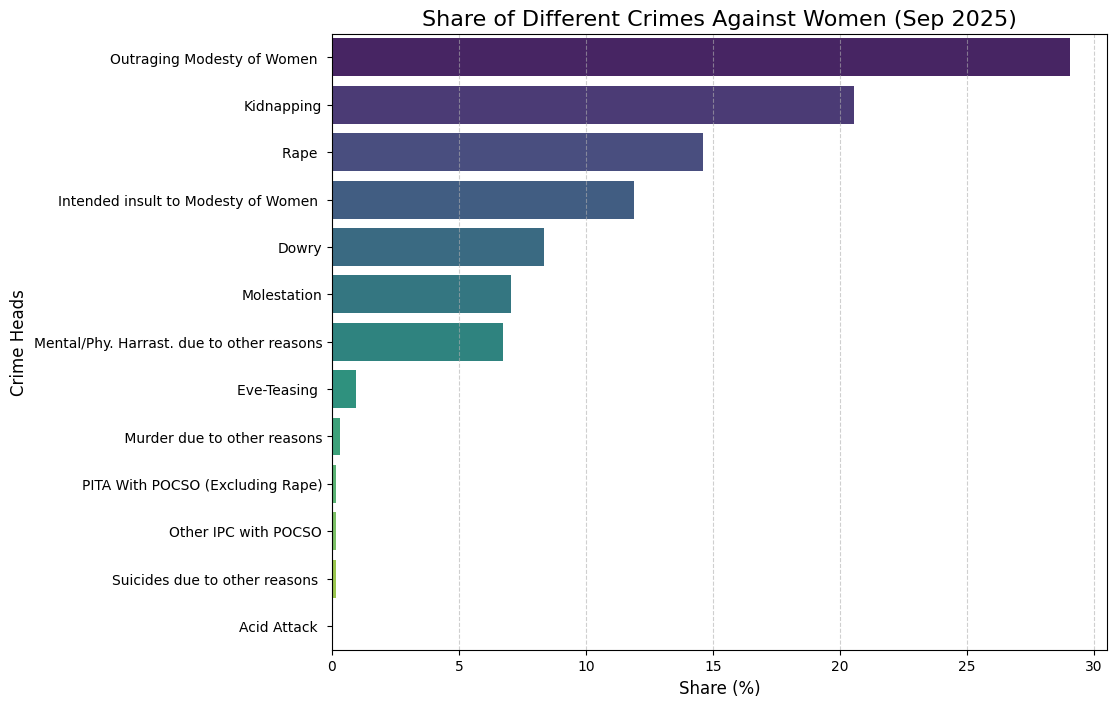

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x="share", y="Crime Heads", data=df2, palette="viridis", hue="Crime Heads")
plt.title("Share of Different Crimes Against Women (Sep 2025)", fontsize=16)
plt.xlabel("Share (%)", fontsize=12)
plt.ylabel("Crime Heads", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
from google.colab import files
women_crimes_img = 'women.png'
files.download(women_crimes_img)
plt.show()

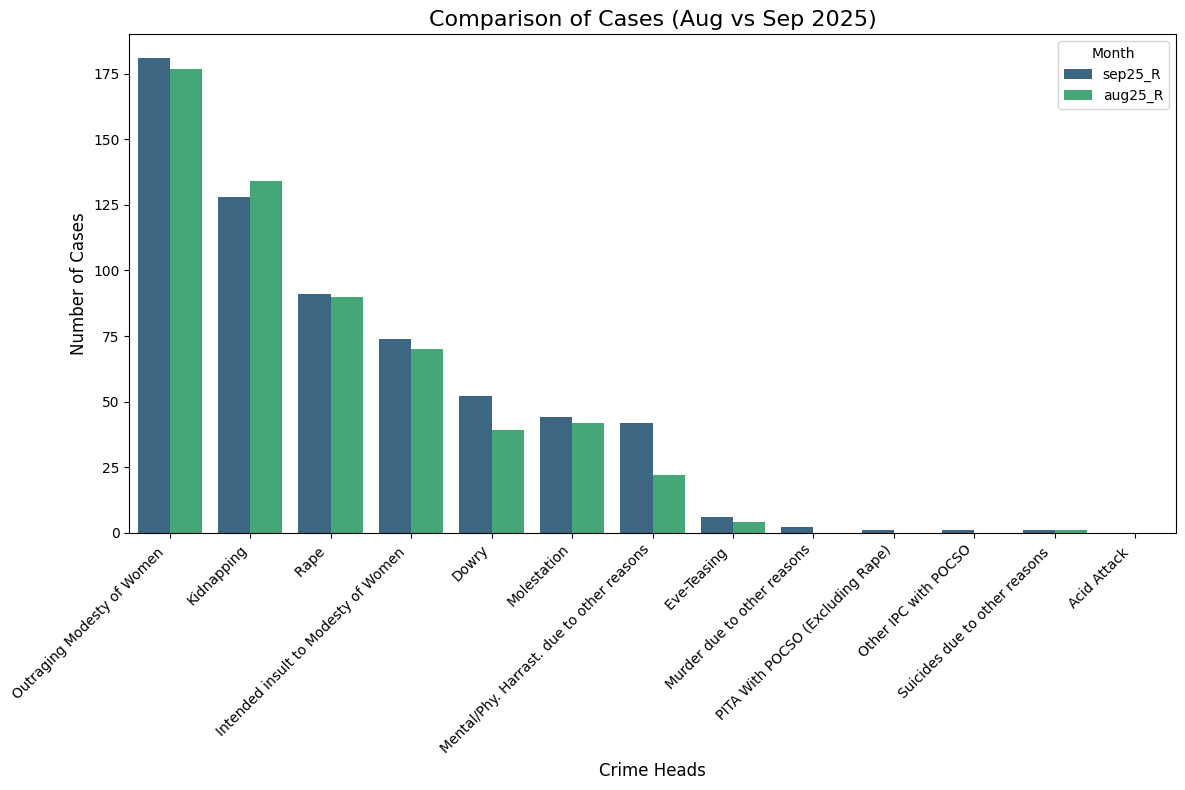

In [ ]:
df2_comparison = df2[['Crime Heads', 'sep25_R', 'aug25_R']].melt('Crime Heads', var_name='Month', value_name='Number of Cases')

plt.figure(figsize=(12, 8))
sns.barplot(x='Crime Heads', y='Number of Cases', palette = 'viridis', hue='Month', data=df2_comparison)
plt.title('Comparison of Cases (Aug vs Sep 2025)', fontsize=16)
plt.xlabel('Crime Heads', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
from google.colab import files
women_comp = 'women_comp.png'
plt.savefig(women_comp)
# files.download(women_comp)
plt.show()

NDPS

In [ ]:
df3 = df3.fillna(0)

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
display(df3)

,Drugs Name,No. of Cases,No. of Person Arrested,Quantity(kg),Values
0,Heroin,46,61,2.01,59858380.00
1,Charas,19,31,23.25,193207900.00
2,Cocaine,18,30,10.20,769095500.00
3,Ganja,547,587,1049.33,366590947.00
4,MD,211,290,257.33,5132325695.00
5,Other Drugs,15,32,0.49,24227819.00
6,Cough Syrup (All types),50,73,0.00,7233105.00
7,Consumption Cases,5137,4284,0.00,0.00


In [ ]:
df3.sort_values(by = ['No. of Cases', 'No. of Person Arrested'], ascending = [False, False], inplace = True)
display(df3)

,Drugs Name,No. of Cases,No. of Person Arrested,Quantity(kg),Values
7,Consumption Cases,5137,4284,0.00,0.00
3,Ganja,547,587,1049.33,366590947.00
4,MD,211,290,257.33,5132325695.00
6,Cough Syrup (All types),50,73,0.00,7233105.00
0,Heroin,46,61,2.01,59858380.00
1,Charas,19,31,23.25,193207900.00
2,Cocaine,18,30,10.20,769095500.00
5,Other Drugs,15,32,0.49,24227819.00


In [ ]:
df3.sort_values(by = 'Values', ascending = False, inplace = True)
df3

,Drugs Name,No. of Cases,No. of Person Arrested,Quantity(kg),Values
4,MD,211,290,257.33,5132325695.00
2,Cocaine,18,30,10.20,769095500.00
3,Ganja,547,587,1049.33,366590947.00
1,Charas,19,31,23.25,193207900.00
0,Heroin,46,61,2.01,59858380.00
5,Other Drugs,15,32,0.49,24227819.00
6,Cough Syrup (All types),50,73,0.00,7233105.00
7,Consumption Cases,5137,4284,0.00,0.00


In [ ]:
df3.sort_values(by = 'Quantity(kg)', ascending = False, inplace = True)
df3

,Drugs Name,No. of Cases,No. of Person Arrested,Quantity(kg),Values
3,Ganja,547,587,1049.33,366590947.00
4,MD,211,290,257.33,5132325695.00
1,Charas,19,31,23.25,193207900.00
2,Cocaine,18,30,10.20,769095500.00
0,Heroin,46,61,2.01,59858380.00
5,Other Drugs,15,32,0.49,24227819.00
6,Cough Syrup (All types),50,73,0.00,7233105.00
7,Consumption Cases,5137,4284,0.00,0.00


In [ ]:
df3['Arrest_per_case'] = df3['No. of Person Arrested']/df3['No. of Cases']
df3.sort_values(by = 'Arrest_per_case', ascending = False)

,Drugs Name,No. of Cases,No. of Person Arrested,Quantity(kg),Values,Arrest_per_case
5,Other Drugs,15,32,0.49,24227819.00,2.13
2,Cocaine,18,30,10.20,769095500.00,1.67
1,Charas,19,31,23.25,193207900.00,1.63
6,Cough Syrup (All types),50,73,0.00,7233105.00,1.46
4,MD,211,290,257.33,5132325695.00,1.37
0,Heroin,46,61,2.01,59858380.00,1.33
3,Ganja,547,587,1049.33,366590947.00,1.07
7,Consumption Cases,5137,4284,0.00,0.00,0.83


In [ ]:
df3['Qty_per_case'] = df3['Quantity(kg)']/df3['No. of Cases']
df3.sort_values(by = 'Qty_per_case', ascending = False)

,Drugs Name,No. of Cases,No. of Person Arrested,Quantity(kg),Values,Arrest_per_case,Qty_per_case
3,Ganja,547,587,1049.33,366590947.00,1.07,1.92
1,Charas,19,31,23.25,193207900.00,1.63,1.22
4,MD,211,290,257.33,5132325695.00,1.37,1.22
2,Cocaine,18,30,10.20,769095500.00,1.67,0.57
0,Heroin,46,61,2.01,59858380.00,1.33,0.04
5,Other Drugs,15,32,0.49,24227819.00,2.13,0.03
6,Cough Syrup (All types),50,73,0.00,7233105.00,1.46,0.00
7,Consumption Cases,5137,4284,0.00,0.00,0.83,0.00


In [ ]:
df3['share'] = df3['No. of Cases']/df3['No. of Cases'].sum()
df3

,Drugs Name,No. of Cases,No. of Person Arrested,Quantity(kg),Values,Arrest_per_case,Qty_per_case,share
3,Ganja,547,587,1049.33,366590947.00,1.07,1.92,0.09
4,MD,211,290,257.33,5132325695.00,1.37,1.22,0.03
1,Charas,19,31,23.25,193207900.00,1.63,1.22,0.00
2,Cocaine,18,30,10.20,769095500.00,1.67,0.57,0.00
0,Heroin,46,61,2.01,59858380.00,1.33,0.04,0.01
5,Other Drugs,15,32,0.49,24227819.00,2.13,0.03,0.00
6,Cough Syrup (All types),50,73,0.00,7233105.00,1.46,0.00,0.01
7,Consumption Cases,5137,4284,0.00,0.00,0.83,0.00,0.85


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

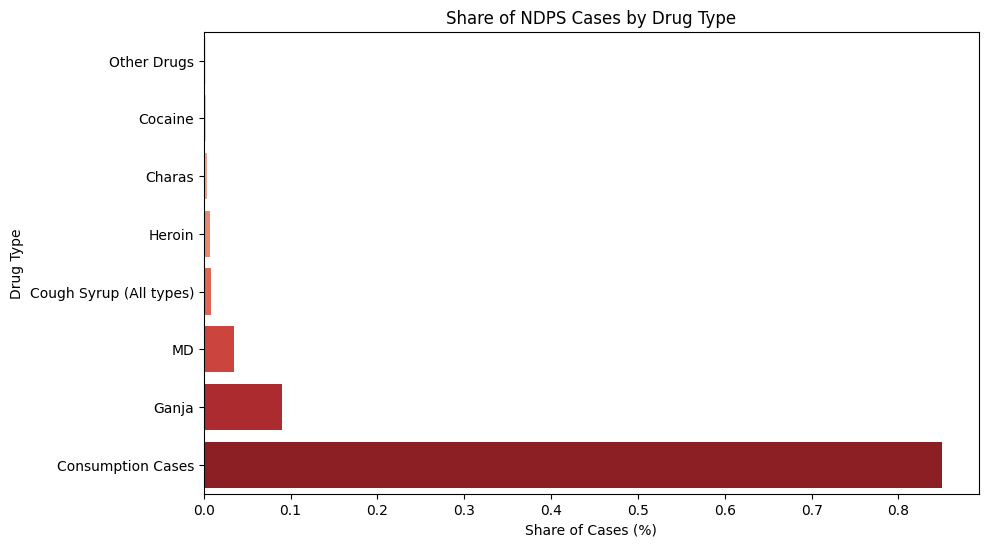

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='share', y='Drugs Name', data=df3.sort_values('share', ascending=True), palette='Reds', hue='Drugs Name', legend=False)
plt.title('Share of NDPS Cases by Drug Type')
plt.xlabel('Share of Cases (%)')
plt.ylabel('Drug Type')
from google.colab import files
plt.savefig('ndps.png')
files.download('ndps.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

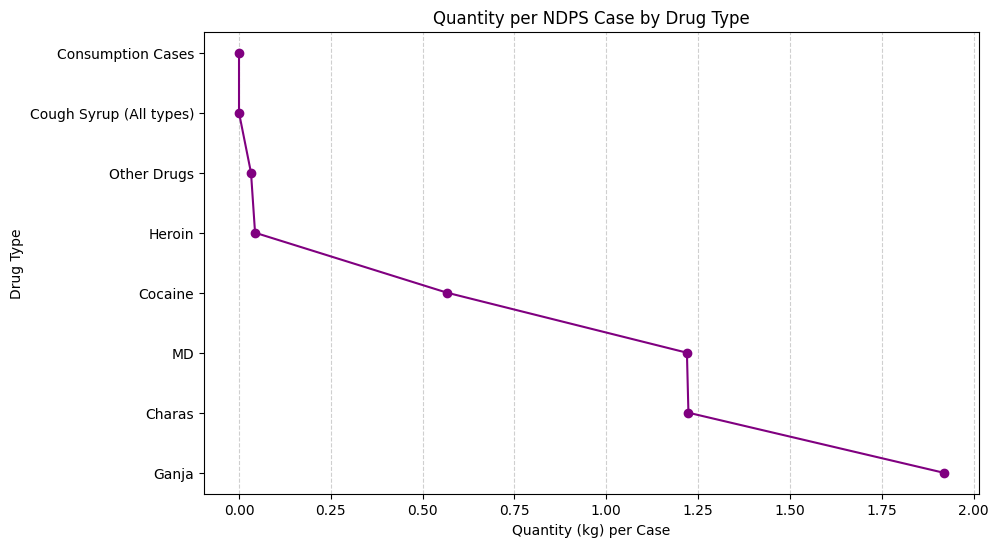

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df3.sort_values('Qty_per_case', ascending=False)['Qty_per_case'], df3.sort_values('Qty_per_case', ascending=False)['Drugs Name'], 'o-', color='purple')
plt.title('Quantity per NDPS Case by Drug Type')
plt.xlabel('Quantity (kg) per Case')
plt.ylabel('Drug Type')
plt.grid(axis='x', linestyle='--', alpha=0.6)
from google.colab import files
plt.savefig('qty_ndps.png')
files.download('qty_ndps.png')
plt.show()

Brothels

In [10]:
df4

,sep25_cases,this_yr,prev_yr,sep25_res,this_yr_res,prev_yr_res,sep25_arr,this_yr_arr,prev_yr_arr
0,9,31,20,23,132,51,22,109,22


In [11]:
df4['arr_per_case_this'] = df4['this_yr_arr']/df4['this_yr']
df4['arr_per_case_prev'] = df4['prev_yr_arr']/df4['prev_yr']

In [13]:
df4['res_per_case_this'] = df4['this_yr_res']/df4['this_yr']
df4['res_per_case_prev'] = df4['prev_yr_res']/df4['prev_yr']

In [14]:
df4

,sep25_cases,this_yr,prev_yr,sep25_res,this_yr_res,prev_yr_res,sep25_arr,this_yr_arr,prev_yr_arr,arr_per_case_this,arr_per_case_prev,res_per_case_this,res_per_case_prev
0,9,31,20,23,132,51,22,109,22,3.516129,1.1,4.258065,2.55


Economic Offenses

In [16]:
df5

,sep25_R,sep25_D,aug25_R,aug25_D,this_yr_R,this_yr_D,% of Det_this,prev_yr_R,prev_yr_D,% of Det_prev
0,16,16,8,8,91,91,100,62,62,100


Cyber Crimes


In [17]:
df6   #PA --> persons arrested.

,Head Wise Crime,Reg.,Det.,PA
0,Tampering of Source Code,0,0,0
1,Phishing /MIM Attack/ Spoofing Mail,39,3,6
2,Pornography,14,9,8
3,Obscene Email / SMS / MMS/Post,180,127,85
4,Fake Social Media Profile/ Morphing Email/ SMS,141,77,71
5,Credit Card / Online Fraud,398,79,51
6,Hacking,53,4,3
7,Custom/Gift Fraud,38,4,3
8,Purchase fraud,68,13,12
9,Job fraud,245,48,32


In [19]:
df6.sort_values(by = 'Reg.', ascending = False, inplace = True)

In [21]:
df6.drop(0, axis = 0, inplace = True)

In [23]:
df6.sort_values(by = 'PA', ascending = False, inplace = True)

In [24]:
df6

,Head Wise Crime,Reg.,Det.,PA
13,Share market investment,665,175,210
22,Other,962,297,207
3,Obscene Email / SMS / MMS/Post,180,127,85
4,Fake Social Media Profile/ Morphing Email/ SMS,141,77,71
18,Digital arrest,121,45,63
5,Credit Card / Online Fraud,398,79,51
14,Investment fraud,195,55,40
9,Job fraud,245,48,32
20,Sextortion,26,17,20
17,Loan fraud,37,11,14


In [37]:
import numpy as np
df6['persons_arr_percase'] = np.where(df6['PA'] == 0, 0, df6['Reg.']/df6['PA'])
df6['persons_arr_percase'] = df6['persons_arr_percase'].fillna(0)

In [35]:
df6.sort_values(by = 'persons_arr_percase', ascending = False, inplace = True)
df6

,Head Wise Crime,Reg.,Det.,PA,persons_arr_percase
6,Hacking,53,4,3,17.666667
7,Custom/Gift Fraud,38,4,3,12.666667
12,Fake website,79,17,7,11.285714
5,Credit Card / Online Fraud,398,79,51,7.803922
9,Job fraud,245,48,32,7.656250
1,Phishing /MIM Attack/ Spoofing Mail,39,3,6,6.500000
10,Insurance fraud,19,5,3,6.333333
8,Purchase fraud,68,13,12,5.666667
14,Investment fraud,195,55,40,4.875000
22,Other,962,297,207,4.647343


In [41]:
df6['share'] = df6['Reg.']/df6['Reg.'].sum()

In [43]:
df6.sort_values(by = 'share', ascending=False, inplace = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

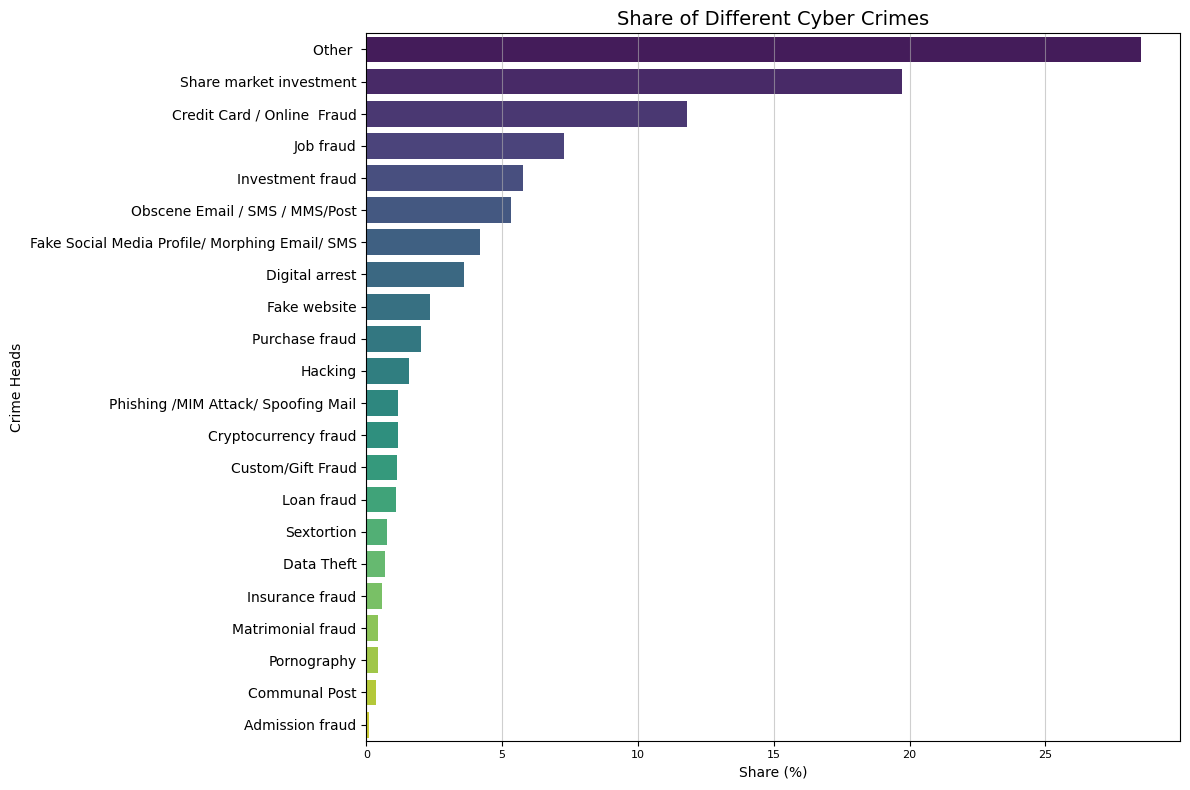

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(x='share', y='Head Wise Crime', data=df6.sort_values('share', ascending=False), palette='viridis', hue='Head Wise Crime', legend=False)
plt.grid(axis = 'x', linestyle = '-', alpha = 0.6)
plt.tick_params(axis='y', labelsize=8) # Adjust fontsize for y-axis labels
plt.tick_params(axis='x', labelsize=8) # Adjust fontsize for x-axis labels
plt.title('Share of Different Cyber Crimes', fontsize=14) # Adjust title fontsize
plt.xlabel('Share (%)', fontsize=10) # Adjust xlabel fontsize
plt.ylabel('Crime Heads', fontsize=10) # Adjust ylabel fontsize
from google.colab import files
plt.savefig('cyber.png')
files.download('cyber.png')
plt.yticks(fontsize = 10)
plt.subplots_adjust(left=0.5)
plt.tight_layout()
plt.show()

In [64]:
df6['%det'] = (df6['Det.']/df6['Reg.'])*100
df6.sort_values(by = '%det', ascending = False, inplace = True)
df6

,Head Wise Crime,Reg.,Det.,PA,persons_arr_percase,share,%det
3,Obscene Email / SMS / MMS/Post,180,127,85,2.117647,5.338078,70.555556
21,Communal Post,12,8,8,1.500000,0.355872,66.666667
20,Sextortion,26,17,20,1.300000,0.771056,65.384615
2,Pornography,14,9,8,1.750000,0.415184,64.285714
4,Fake Social Media Profile/ Morphing Email/ SMS,141,77,71,1.985915,4.181495,54.609929
19,Data Theft,23,11,9,2.555556,0.682088,47.826087
18,Digital arrest,121,45,63,1.920635,3.588375,37.190083
15,Matrimonial fraud,15,5,5,3.000000,0.444840,33.333333
22,Other,962,297,207,4.647343,28.529063,30.873181
17,Loan fraud,37,11,14,2.642857,1.097272,29.729730


In [66]:
df6['Arrest_rate'] = (df6['PA']/df6['Reg.'])*100
df6.sort_values(by = 'Arrest_rate', ascending = False, inplace = True)
df6

,Head Wise Crime,Reg.,Det.,PA,persons_arr_percase,share,%det,Arrest_rate
20,Sextortion,26,17,20,1.300000,0.771056,65.384615,76.923077
21,Communal Post,12,8,8,1.500000,0.355872,66.666667,66.666667
2,Pornography,14,9,8,1.750000,0.415184,64.285714,57.142857
18,Digital arrest,121,45,63,1.920635,3.588375,37.190083,52.066116
4,Fake Social Media Profile/ Morphing Email/ SMS,141,77,71,1.985915,4.181495,54.609929,50.354610
3,Obscene Email / SMS / MMS/Post,180,127,85,2.117647,5.338078,70.555556,47.222222
19,Data Theft,23,11,9,2.555556,0.682088,47.826087,39.130435
17,Loan fraud,37,11,14,2.642857,1.097272,29.729730,37.837838
15,Matrimonial fraud,15,5,5,3.000000,0.444840,33.333333,33.333333
13,Share market investment,665,175,210,3.166667,19.721234,26.315789,31.578947


<Axes: xlabel='Head Wise Crime'>

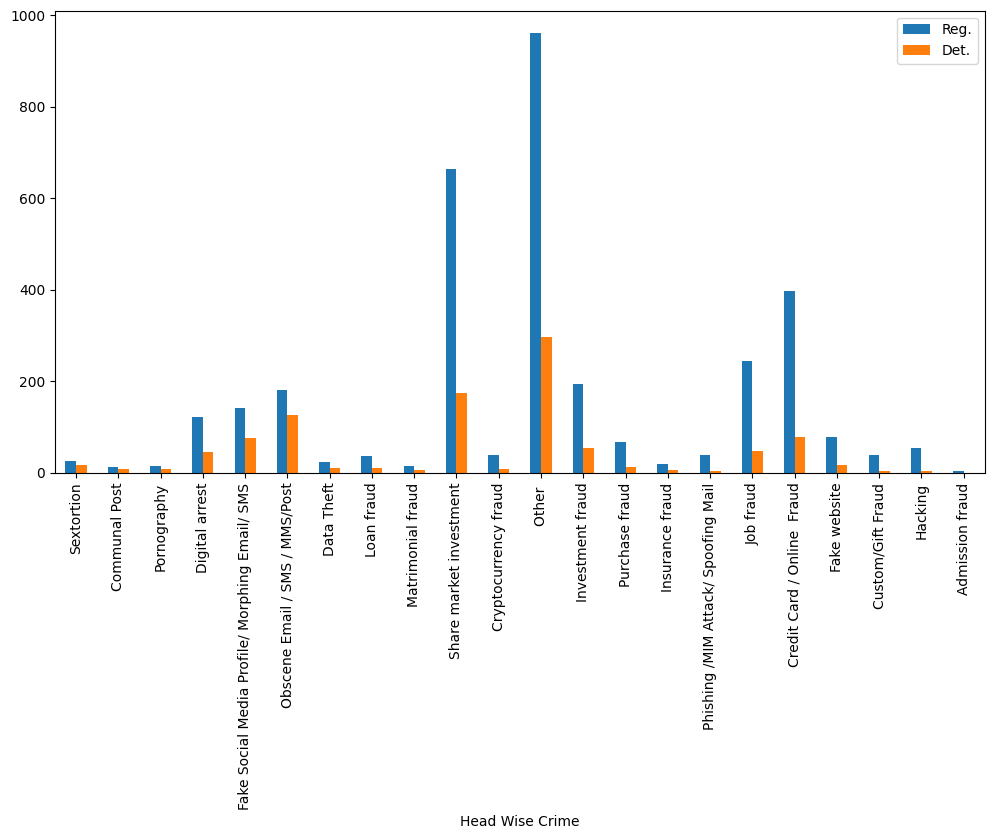

In [67]:
df6[['Head Wise Crime', 'Reg.', 'Det.']].plot(kind='bar', x='Head Wise Crime', figsize=(12,6))


In [69]:
with pd.ExcelWriter('crimedata_simplified.xlsx') as writer:
    df1.to_excel(writer, sheet_name='IPC', index=False)
    df2.to_excel(writer, sheet_name='women', index=False)
    df3.to_excel(writer, sheet_name='ndps', index=False)
    df4.to_excel(writer, sheet_name='brothels', index=False)
    df5.to_excel(writer, sheet_name='ecconomic_offenses', index=False)
    df6.to_excel(writer, sheet_name='cyber', index=False)

from google.colab import files
files.download('crimedata_simplified.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>